### Limpieza de datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import os

In [2]:
ruta = 'c:\\Users\\ps.escobar\\OneDrive - Universidad de los andes\\Documentos\\GitHub\\predicting_poverty_bdmc'
print(os.getcwd())

#'c:\\Users\\ps.escobar\\OneDrive - Universidad de los andes\\Documentos\\GitHub\\predicting_poverty_bdmc'

c:\Users\ps.escobar\OneDrive - Universidad de los andes\Documentos\GitHub\predicting_poverty_bdmc\scripts


In [3]:
#Amrimos las bases de datos
tr_p = pd.read_csv(ruta+'\\stores\\train_personas.csv')
ts_p = pd.read_csv(ruta+'\\stores\\test_personas.csv')
tr_h = pd.read_csv(ruta+'\\stores\\train_hogares.csv')
ts_h = pd.read_csv(ruta+'\\stores\\test_hogares.csv')

In [4]:
#Crear variables para luego unir bases
tr_p['sample'] = 'train'
tr_h['sample'] = 'train'
ts_p['sample'] = 'test'
ts_h['sample'] = 'test'

In [5]:
#train personas
trp_l = tr_p.rename(columns = {
    'P6020': 'sexo',
    'P6040': 'edad',
    'P6090': 'afil_salud',
    'P6100': 'reg_salud',
    'P6210': 'nivel_edu',
    'P6210s1': 'anos_edu',
    'P6240': 'semana_oficio',
    'P6430': 'posi_lab',
    'P6510': 'h_extra',
    'P6545': 'prima',
    'P6580': 'bonos',
    'P6585s1': 'a_alim',
    'P6585s2': 'a_trans',
    'P6585s3': 'a_fam',
    'P6585s4': 'a_edu',
    'P6590': 'sal_alim',
    'P6600': 'sal_viv',
    'P6620': 'sal_especie',
    'P6630s1': 'prima_serv',
    'P6630s2': 'prima_nav',
    'P6630s3': 'prima_vac',
    'P6630s4': 'viaticos',
    'P6630s6': 'bon_anual',
    'P6800': 'h_tra_prin',
    'P6920': 'afil_pension',
    'P7045': 'h_tra_2',
    'P7495': 'arriendo',
    'P7500s2': 'pension',
    'P7500s3': 'pat_pension',
    'P7510s2': 'hog_int',
    'P7510s3': 'ayuda_gov',
    'P7510s5': 'rent_inv',
    'P7510s6': 'rent_cesantias',
    'P7510s7': 'otras_fuentes',
    'P7422': 'ing_desempleo',
    'Ingtot' : 'ingtot'
})

#test personas
tsp_l = ts_p.rename(columns = {
    'P6020': 'sexo',
    'P6040': 'edad',
    'P6090': 'afil_salud',
    'P6100': 'reg_salud',
    'P6210': 'nivel_edu',
    'P6210s1': 'anos_edu',
    'P6240': 'semana_oficio',
    'P6430': 'posi_lab',
    'P6510': 'h_extra',
    'P6545': 'prima',
    'P6580': 'bonos',
    'P6585s1': 'a_alim',
    'P6585s2': 'a_trans',
    'P6585s3': 'a_fam',
    'P6585s4': 'a_edu',
    'P6590': 'sal_alim',
    'P6600': 'sal_viv',
    'P6620': 'sal_especie',
    'P6630s1': 'prima_serv',
    'P6630s2': 'prima_nav',
    'P6630s3': 'prima_vac',
    'P6630s4': 'viaticos',
    'P6630s6': 'bon_anual',
    'P6800': 'h_tra_prin',
    'P6920': 'afil_pension',
    'P7045': 'h_tra_2',
    'P7495': 'arriendo',
    'P7500s2': 'pension',
    'P7500s3': 'pat_pension',
    'P7510s2': 'hog_int',
    'P7510s3': 'ayuda_gov',
    'P7510s5': 'rent_inv',
    'P7510s6': 'rent_cesantias',
    'P7510s7': 'otras_fuentes',
    'P7422': 'ing_desempleo',
    'Ingtot' : 'ingtot'
})

In [6]:
#Nos quedamos con algunas variables para cada base

trp_l = trp_l[['id', 'Orden', 'Clase', 'Dominio', 'sexo', 'edad', 'afil_salud', 
               'reg_salud', 'nivel_edu', 'anos_edu', 'semana_oficio', 'posi_lab', 'h_extra', 
               'prima', 'bonos', 'a_alim', 'a_trans', 'a_fam', 'a_edu', 'sal_alim',
                'sal_viv', 'sal_especie', 'prima_serv', 'prima_nav', 'prima_vac', 
                'viaticos', 'bon_anual', 'h_tra_prin', 'afil_pension', 'h_tra_2', 
                'arriendo', 'pension', 'pat_pension', 'hog_int', 'ayuda_gov', 'rent_inv', 
                'rent_cesantias', 'otras_fuentes', 'semana_oficio', 
                'ing_desempleo', 'sample', 'ingtot']]

In [7]:
#Nos quedamos con algunas variables para cada base

tsp_l = tsp_l[['id', 'Orden', 'Clase', 'Dominio', 'sexo', 'edad', 'afil_salud',
                'reg_salud', 'nivel_edu', 'anos_edu', 'semana_oficio', 'posi_lab',
                'h_extra', 'prima', 'bonos', 'a_alim', 'a_trans', 'a_fam', 'a_edu',
                'sal_alim', 'sal_viv', 'sal_especie', 'prima_serv', 'prima_nav',
                'prima_vac', 'viaticos', 'bon_anual', 'h_tra_prin', 'afil_pension',
                'h_tra_2', 'arriendo', 'pension', 'pat_pension', 'hog_int', 'ayuda_gov',
                'rent_inv', 'rent_cesantias', 'otras_fuentes', 'semana_oficio',
                'ing_desempleo', 'sample']]

In [8]:
print(trp_l.shape)
print(tsp_l.shape)

(543109, 42)
(219644, 41)


In [9]:
tsp_l['ingtot'] = None
tsp_l.head()

,id,Orden,Clase,Dominio,sexo,edad,afil_salud,reg_salud,nivel_edu,anos_edu,...,pat_pension,hog_int,ayuda_gov,rent_inv,rent_cesantias,otras_fuentes,semana_oficio,ing_desempleo,sample,ingtot
0,3279230a4917cdf883df34cd,1,1,MEDELLIN,1,33,1.0,1.0,6.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,test,None
1,3279230a4917cdf883df34cd,3,1,MEDELLIN,2,7,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test,None
2,3279230a4917cdf883df34cd,2,1,MEDELLIN,2,37,1.0,1.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,test,None
3,3279230a4917cdf883df34cd,4,1,MEDELLIN,1,5,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test,None
4,01bd1f72445acc719d19bd25,1,1,MEDELLIN,1,27,1.0,1.0,5.0,11.0,...,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,test,None


In [10]:
print(trp_l.shape)
print(tsp_l.shape)

(543109, 42)
(219644, 42)


In [11]:
#Unir las bases de datos
#Unimos mediante
#usamos outer para conservar todas las filas de ambas bases
data_p = pd.concat([trp_l, tsp_l], ignore_index = True)

In [12]:
data_p.shape

(762753, 42)

In [13]:
data_p.head()

,id,Orden,Clase,Dominio,sexo,edad,afil_salud,reg_salud,nivel_edu,anos_edu,...,pat_pension,hog_int,ayuda_gov,rent_inv,rent_cesantias,otras_fuentes,semana_oficio,ing_desempleo,sample,ingtot
0,8d0193e328305a042001a35f,2,1,MEDELLIN,2,38,1.0,1.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,train,1.109190e+06
1,8d0193e328305a042001a35f,5,1,MEDELLIN,1,3,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train,NaN
2,8d0193e328305a042001a35f,1,1,MEDELLIN,1,41,1.0,1.0,5.0,11.0,...,NaN,2.0,2.0,2.0,1.0,2.0,6.0,NaN,train,1.399140e+06
3,8d0193e328305a042001a35f,4,1,MEDELLIN,1,3,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train,NaN
4,8d0193e328305a042001a35f,3,1,MEDELLIN,1,11,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train,NaN


In [14]:
print(data_p.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762753 entries, 0 to 762752
Data columns (total 42 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              762753 non-null  object 
 1   Orden           762753 non-null  int64  
 2   Clase           762753 non-null  int64  
 3   Dominio         762753 non-null  object 
 4   sexo            762753 non-null  int64  
 5   edad            762753 non-null  int64  
 6   afil_salud      628486 non-null  float64
 7   reg_salud       586224 non-null  float64
 8   nivel_edu       730826 non-null  float64
 9   anos_edu        628486 non-null  float64
 10  semana_oficio   628486 non-null  float64
 11  posi_lab        348015 non-null  float64
 12  h_extra         161340 non-null  float64
 13  prima           161340 non-null  float64
 14  bonos           161340 non-null  float64
 15  a_alim          161340 non-null  float64
 16  a_trans         161340 non-null  float64
 17  a_fam     

<Axes: >

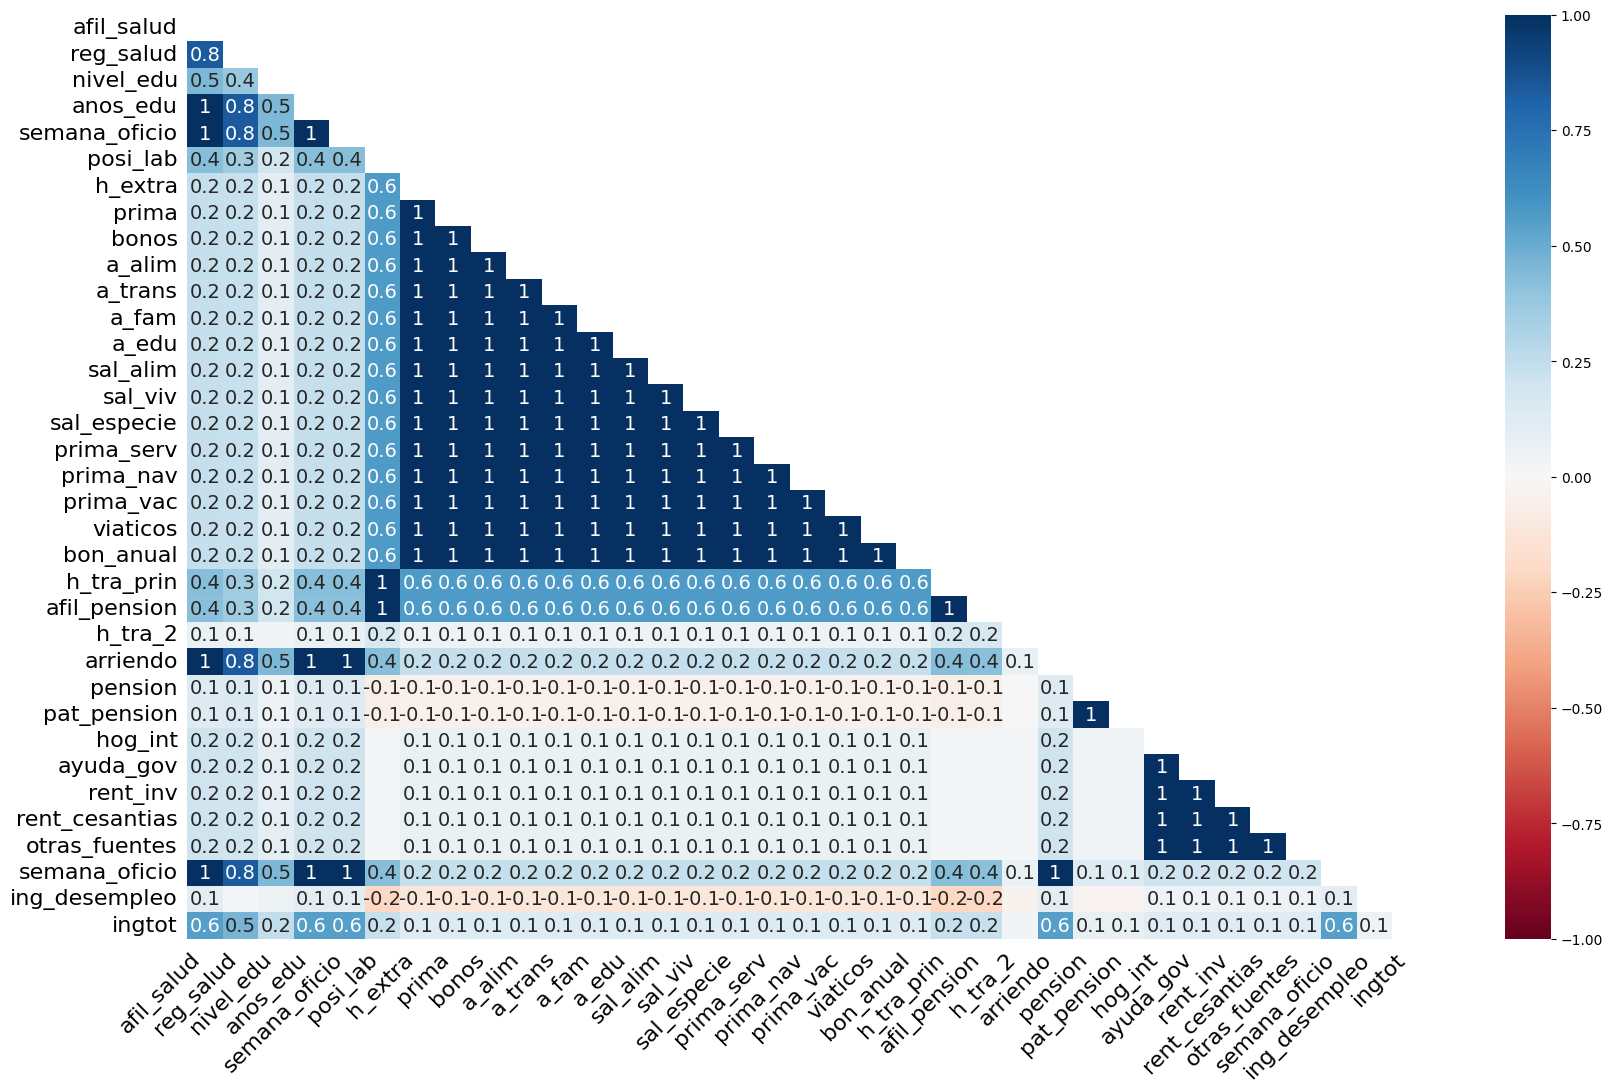

In [15]:
msno.heatmap(data_p)
#Las correlaciones entre valores nulos son las esperadas

El dendograma nos ayuda a enternder como se estan agrupando los datos hasta el moemento

<Axes: >

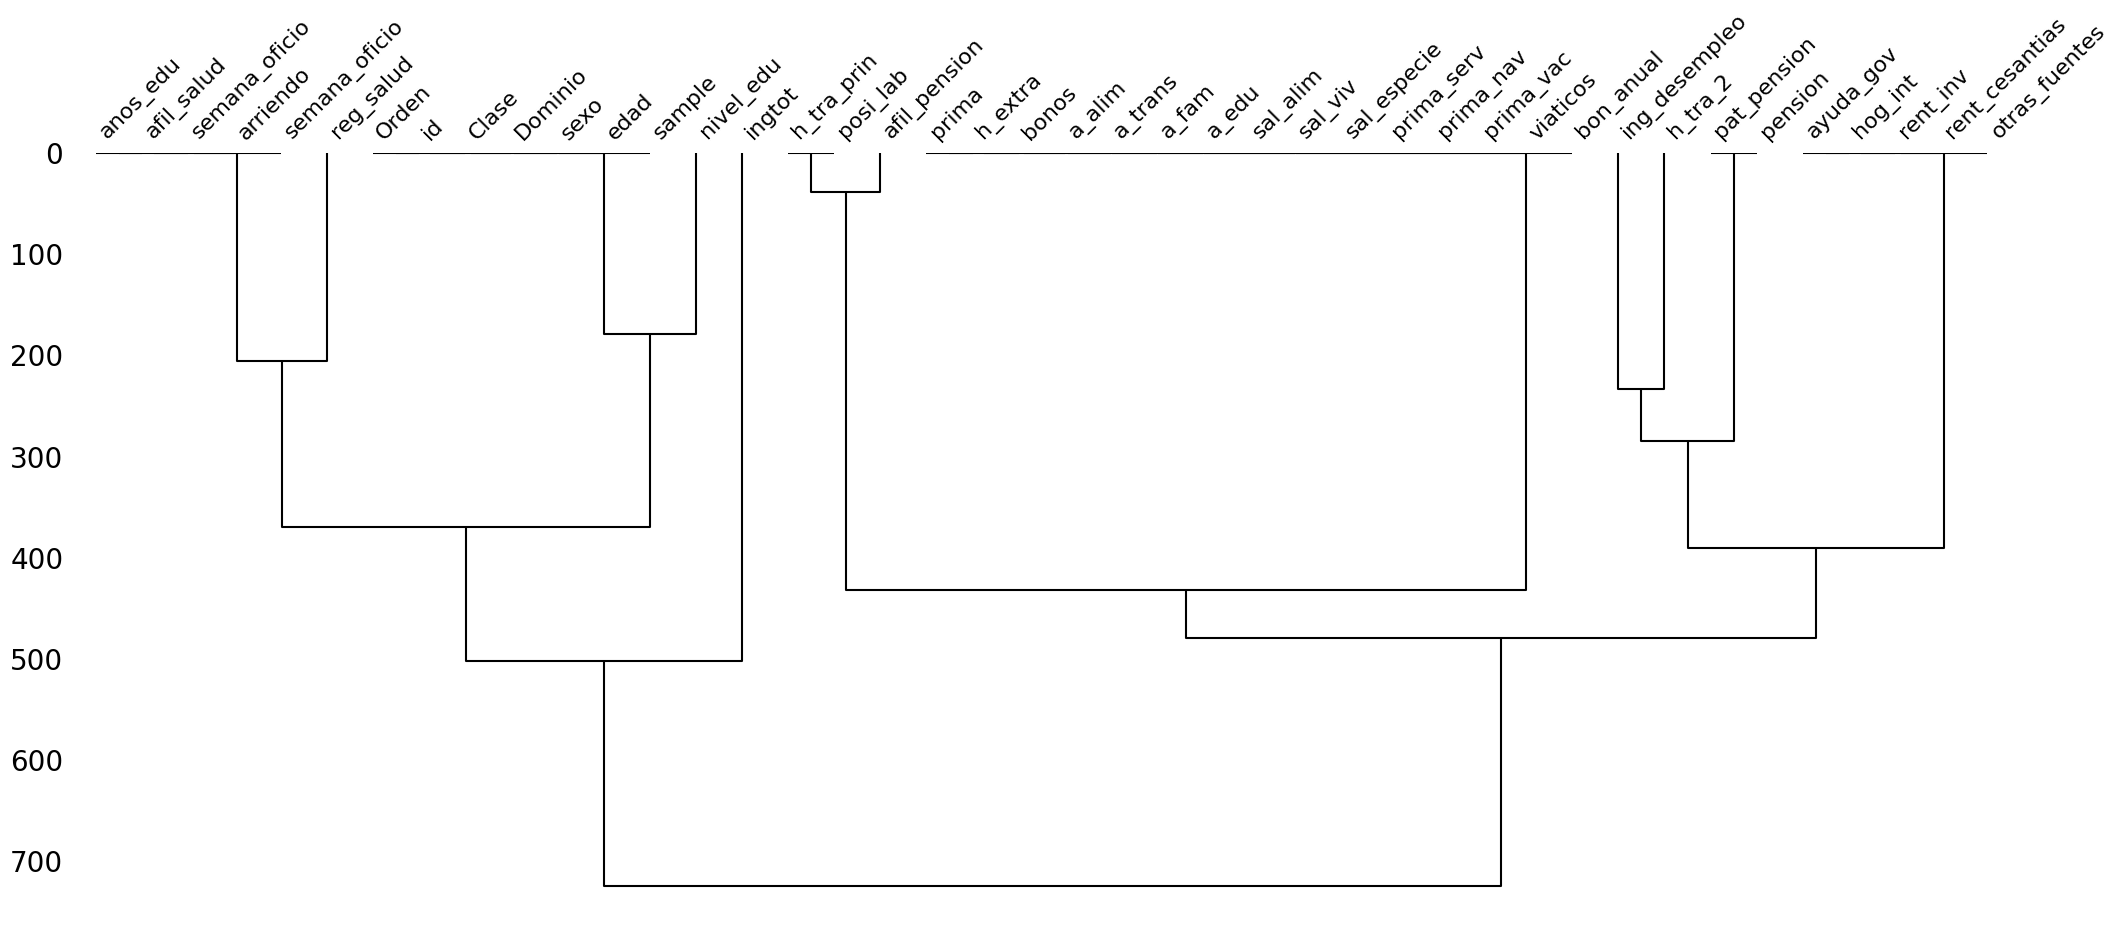

In [16]:
msno.dendrogram(data_p)

<Axes: >

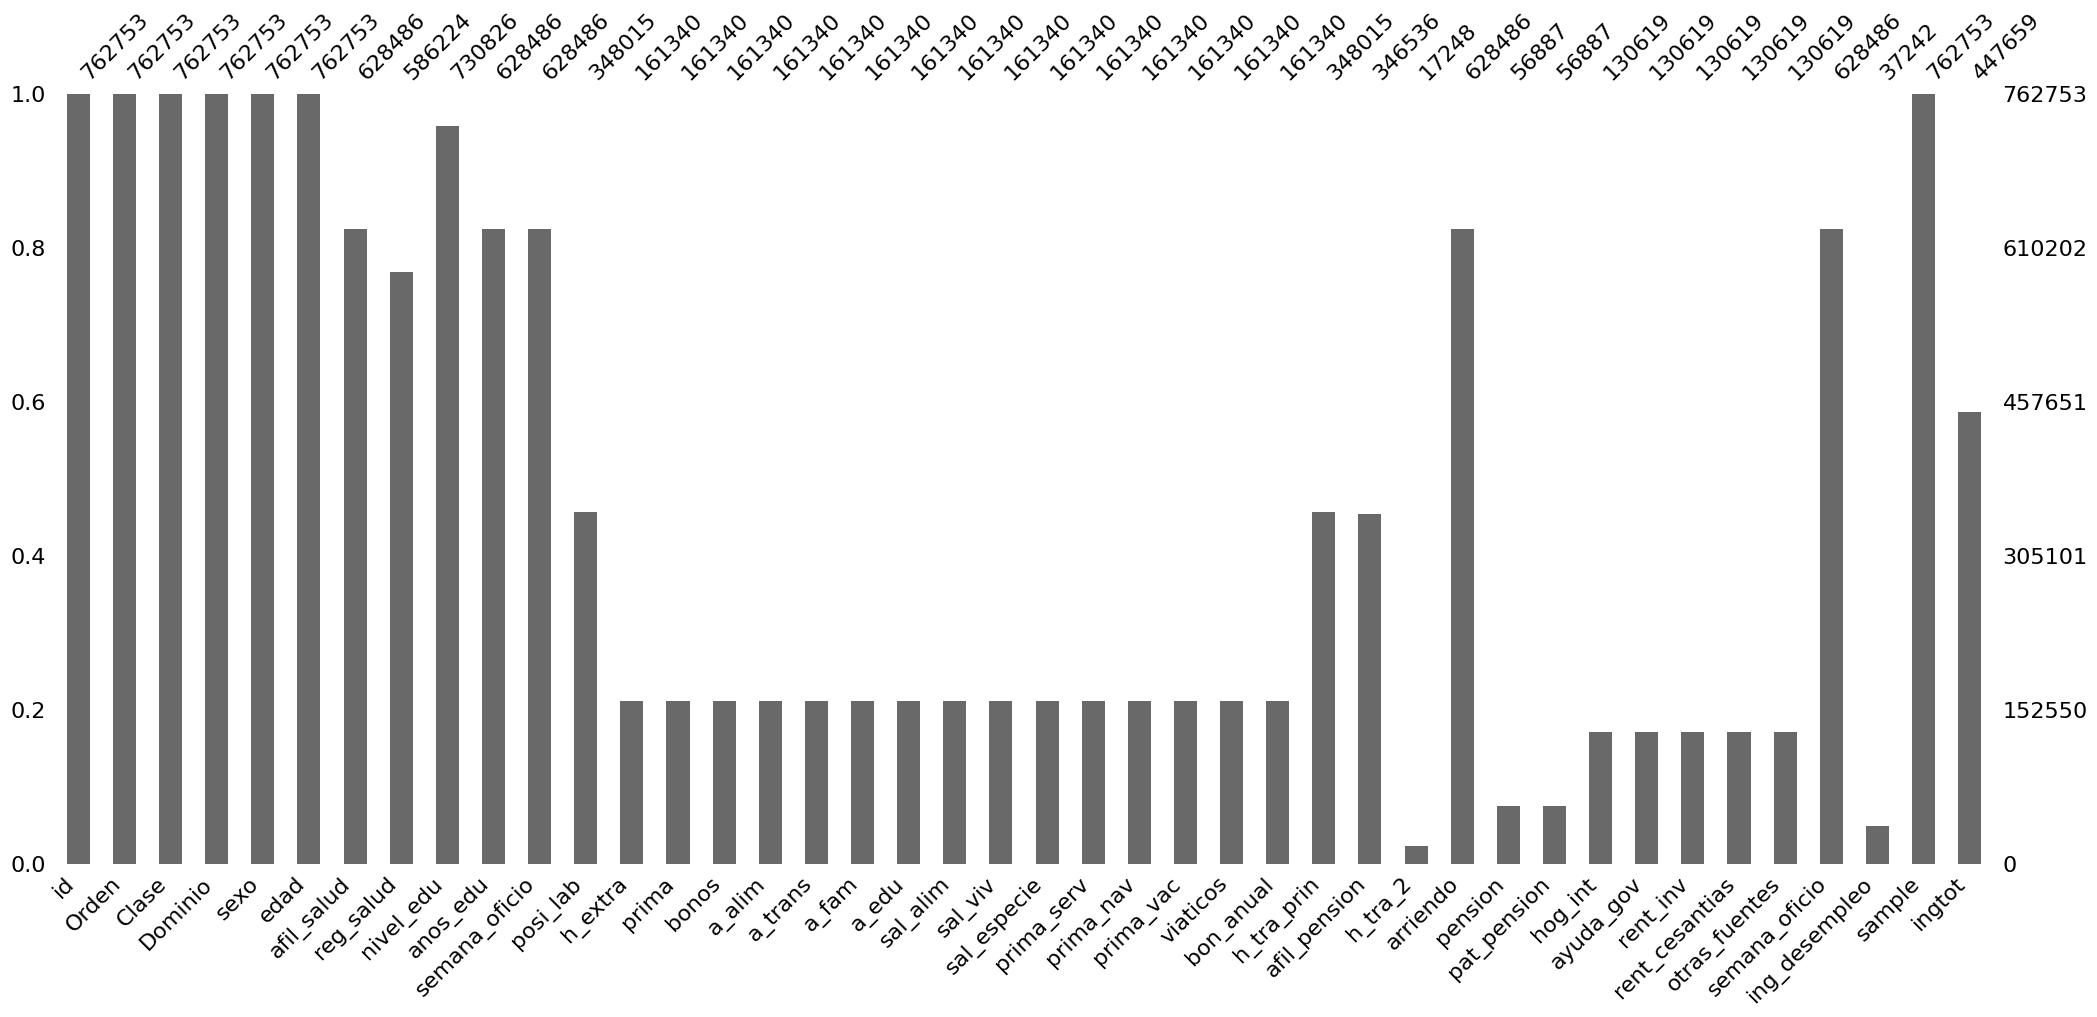

In [17]:
msno.bar(data_p)

Vamos a suponer:
1. los missing en afiliación a salud son personas "no saben no responden"
2. los missing en regimenes de salud son personas "no saben no responden"
3. los missing de arriendo son ingresos por este concepto igual a 0
4. los missing en afiliación pensión son personas no cotisantes

In [21]:
print(data_p['afil_salud'].unique())
print(data_p['reg_salud'].unique())
print(data_p[''].unique)

[ 1. nan  2.  9.]
[ 1. nan  3.  2.  9.]


In [52]:
data_p['afil_salud'] = data_p['afil_salud'].replace([np.nan], 9)
data_p['reg_salud'] = data_p['reg_salud'].replace([np.nan], 9)
data_p['arriendo'] = data_p['arriendo'].replace([np.nan], 0)

(array([2.76512e+05, 2.81480e+04, 2.81370e+05, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.94000e+02]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

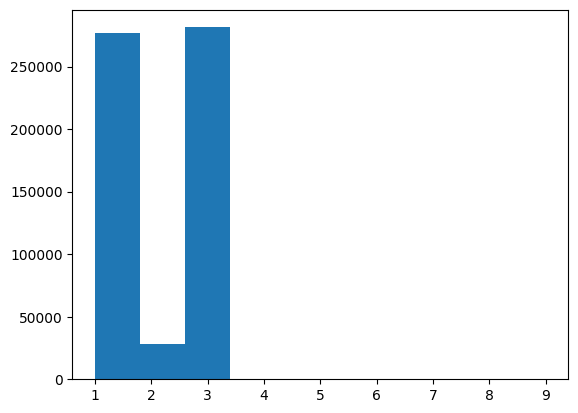

In [19]:
x = data_p['reg_salud']

fig, ax = plt.subplots()
ax.hist(x)